In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/InternshipTask/taskdata.csv')

In [192]:
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [ ]:
df.shape

(4407, 10)

In [193]:
df.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

## Checking about missing values in the data

In [195]:
df.isnull().sum()

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

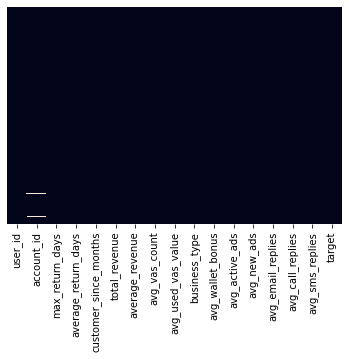

In [196]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

User id and Account id not required in further process so we can drop these columns

In [197]:
df = df.drop(['user_id', 'account_id'], axis=1)

In [198]:
df.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


Checking about correlation between features in a dataset

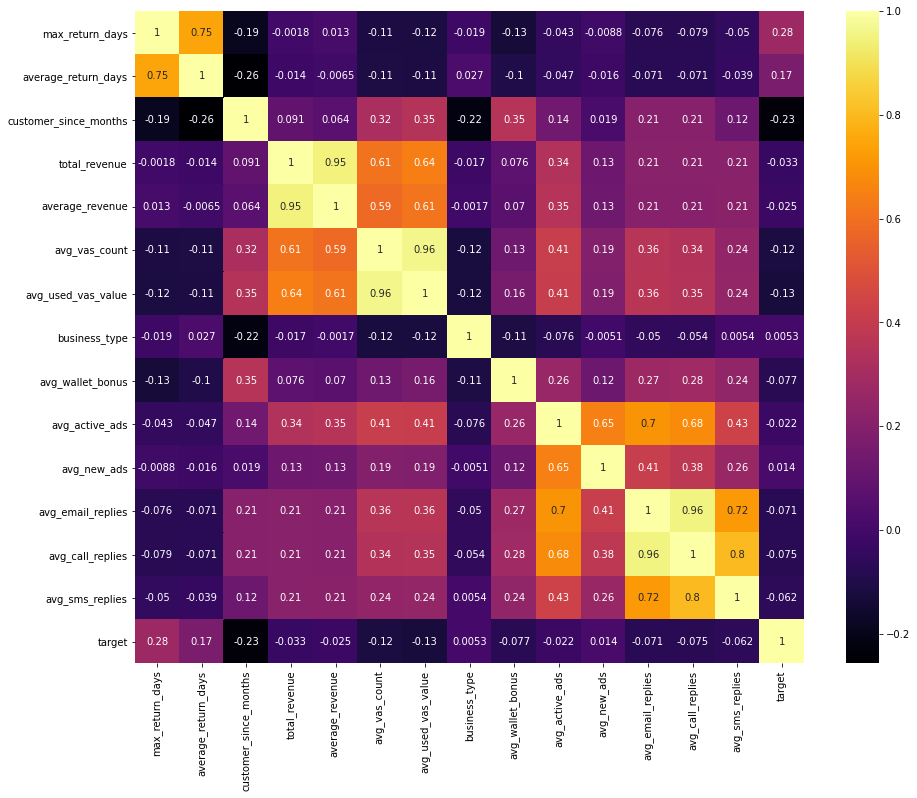

In [199]:
plt.figure(figsize=(15,12))
corrmat = df.corr()
sns.heatmap(corrmat, annot=True, cmap=plt.cm.inferno)

Add some new features

In [200]:
# If user gives replay in call, email and sms less than mean of total replies of call, email and sms than we can say that user gives replay sometimes..
df['avg_replies'] = (df['avg_call_replies']+df['avg_email_replies']+df['avg_sms_replies'])/3
def replay_sometimes(df):
  if df['avg_replies'] < 17.82:
    return 1
  else:
    return 0

df['replay_sometimes'] = df.apply(lambda df: replay_sometimes(df), axis=1)

# If user is customer more than or equl to 12 months so user is costomer is more than year
def customer_more_than_year(df):
  if df['customer_since_months'] >= 12:
    return 1
  else:
    return 0
  
df['customer_more_than_year'] = df.apply(lambda df: customer_more_than_year(df), axis=1)

# In this feature if total revenue and average revenue is 0 than we can say that there is no revenue..
def no_revenue(df):
  if df['total_revenue'] == 0.0 and df['average_revenue'] == 0.0:
    return 1
  else:
    return 0

df['no_revenue'] = df.apply(lambda df: no_revenue(df), axis=1)

In [201]:
df.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target,avg_replies,replay_sometimes,customer_more_than_year,no_revenue
0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0,20.194444,0,1,1
1,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0,10.000000,1,0,1
2,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0,14.916667,1,1,1
3,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1,48.358974,0,1,1
4,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0,14.487179,1,1,1


 Remove some unnecessary features

In [202]:
# Total 9 features will remove
# 1=> customer_since_months, avg_email_replies, avg_call_replies, avg_sms_replies, total_revenue, average_revenue and avg_replies because new features are derived from these featuers
# 2=> avg_vas_count, average_return_days because these features are highly correlated with other features..

df = df.drop(['customer_since_months', 'avg_email_replies', 'avg_call_replies', 'avg_sms_replies', 'total_revenue', 'average_revenue', 'avg_replies', 'avg_vas_count', 'average_return_days'], axis=1)

In [305]:
df.head()

,max_return_days,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,target,replay_sometimes,customer_more_than_year,no_revenue
0,8,66.666667,0,300.0,79.333333,15.250000,0,0,1,1
1,37,114.000000,0,0.0,232.100000,18.300000,0,1,0,1
2,9,106.666667,0,150.0,55.083333,3.750000,0,1,1,1
3,1,176.153846,0,1481.0,409.538462,80.769231,1,0,1,1
4,1,109.230769,0,41.5,48.230769,1.692308,0,1,1,1


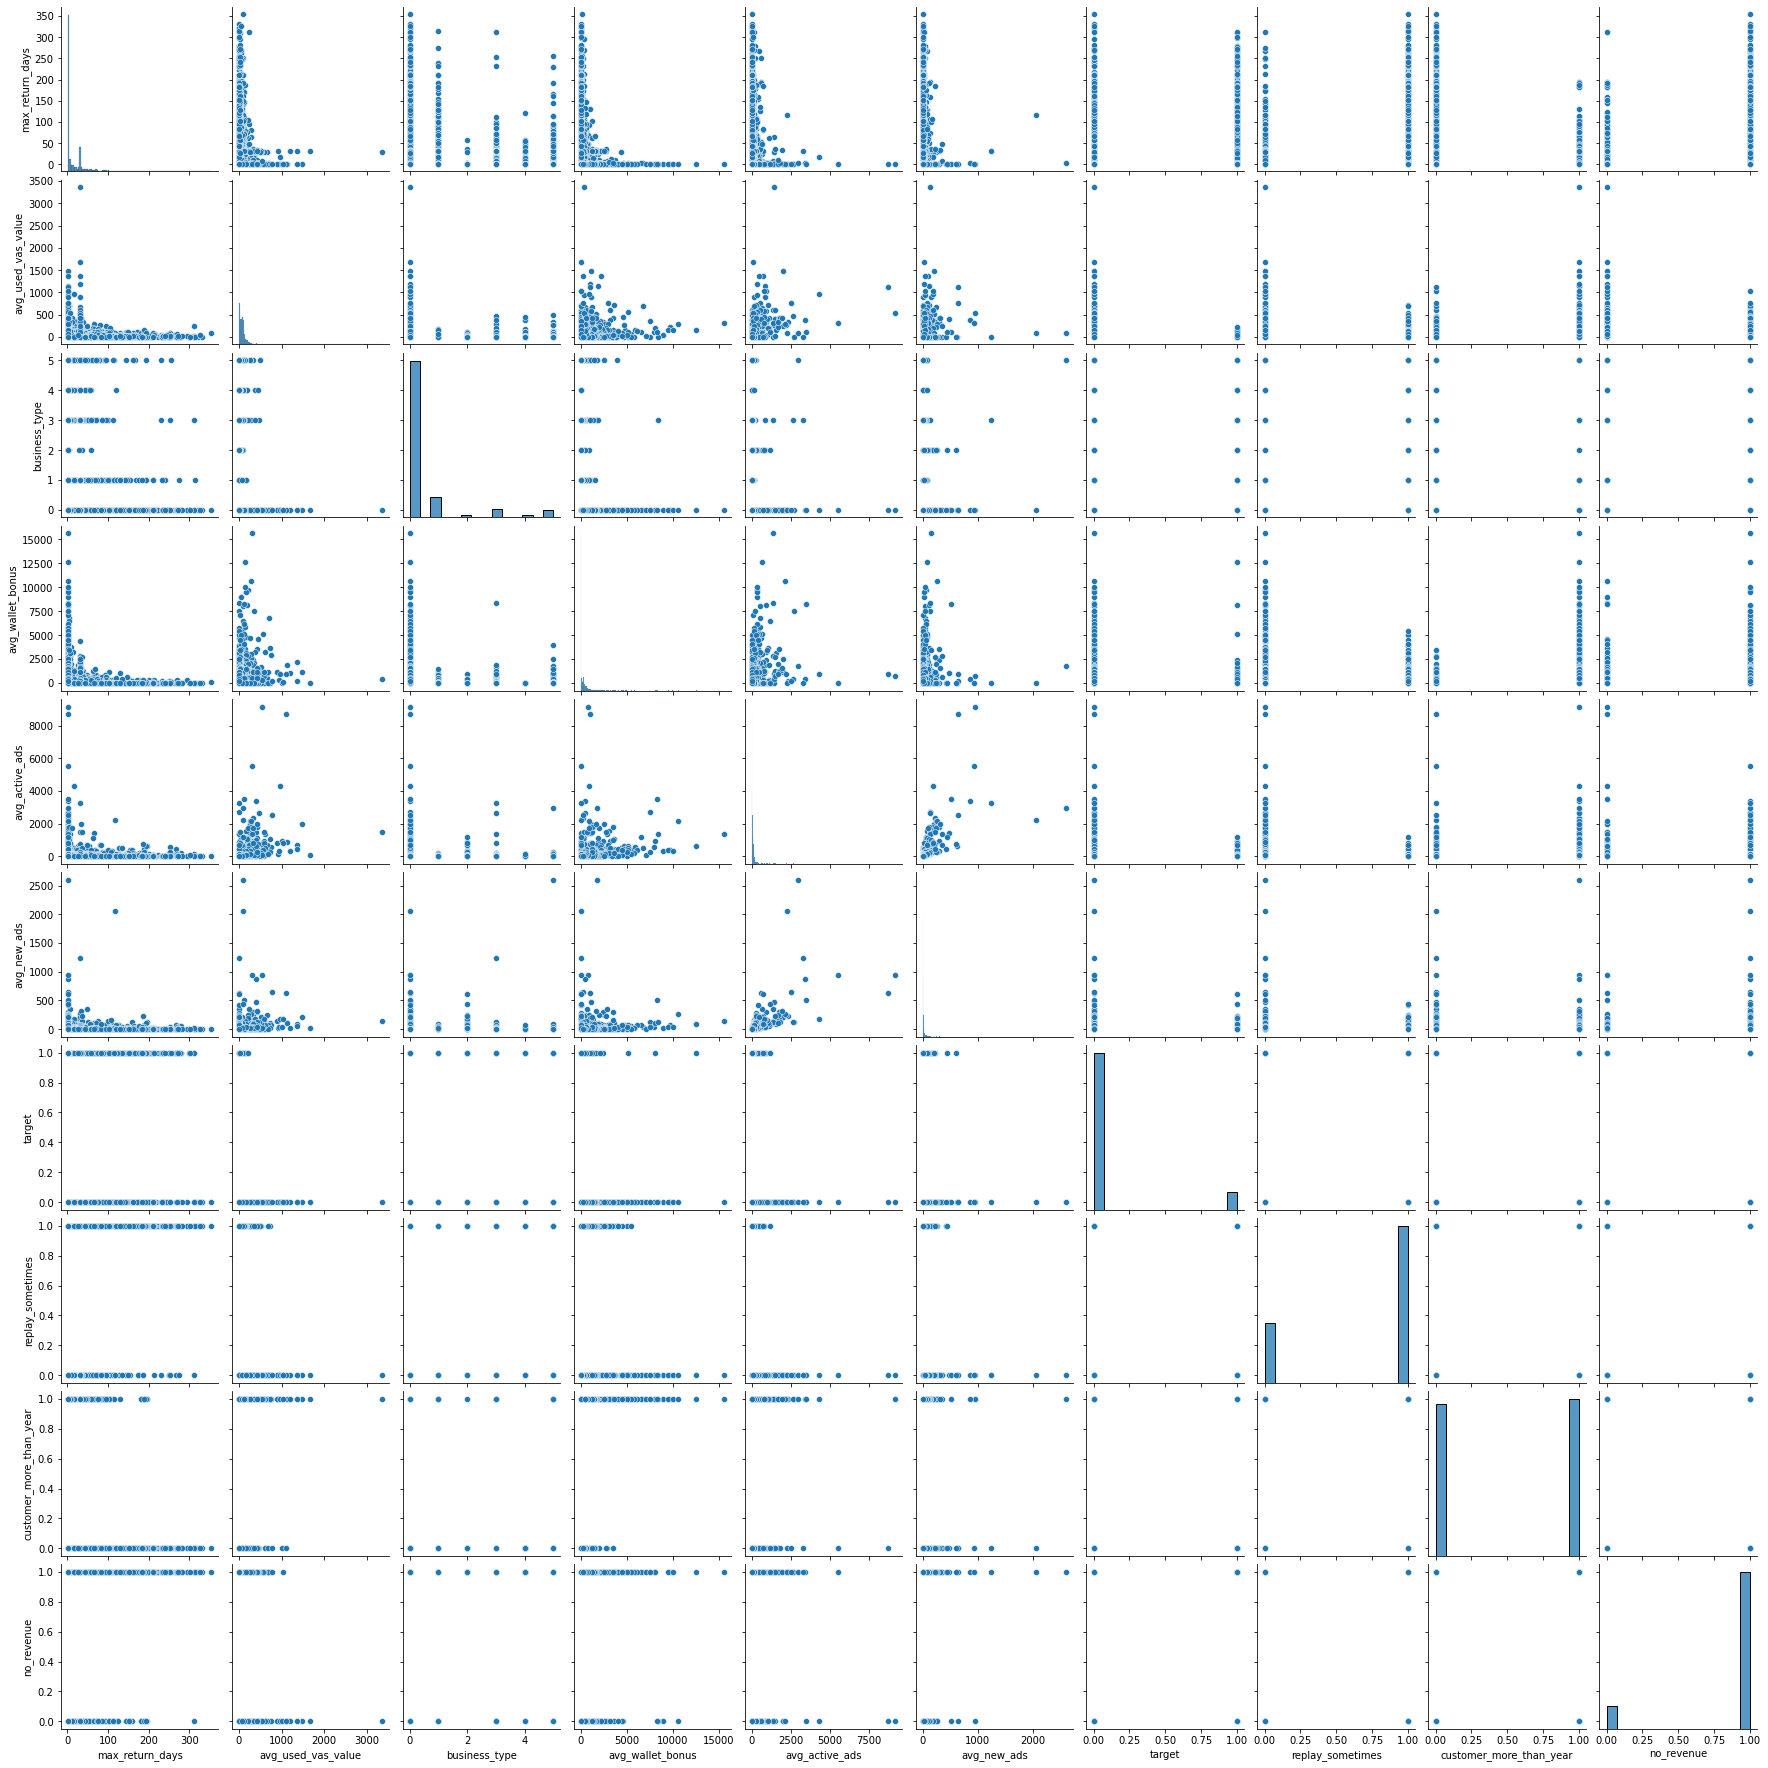

In [ ]:
sns.pairplot(df, kind='scatter')

Check imbalanced dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


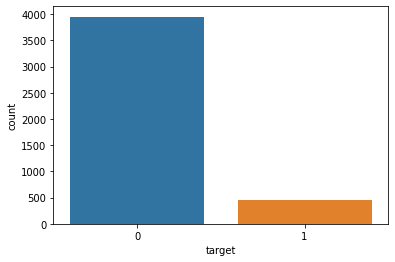

In [204]:
sns.countplot(df['target'])

In [205]:
# Separate Independent and dependent features
X = df.drop('target', axis=1)
y = df.target

In [306]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [251]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [253]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Create DNN for Classification

In [276]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=9))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [272]:
# Dataset is imbalanced that's why initialize class weight
class_weight = {0:0.40, 1:0.60}

In [273]:
# Fit the data into model
model.fit(X_train, y_train, epochs=50, batch_size=32, class_weight=class_weight)

Epoch 1/50
97/97 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.8398
Epoch 2/50
97/97 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.8489
Epoch 3/50
97/97 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.8768
Epoch 4/50
97/97 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.8820
Epoch 5/50
97/97 [==============================] - 0s 2ms/step - loss: 0.1773 - accuracy: 0.8953
Epoch 6/50
97/97 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.8878
Epoch 7/50
97/97 [==============================] - 0s 2ms/step - loss: 0.1647 - accuracy: 0.8946
Epoch 8/50
97/97 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.8936
Epoch 9/50
97/97 [==============================] - 0s 2ms/step - loss: 0.1736 - accuracy: 0.8940
Epoch 10/50
97/97 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.8930
Epoch 11/50
97/97 [

In [274]:
# Train and test accuracy scores 
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.9072632789611816 
 Error on training data: 0.09273672103881836
Accuracy on test data: 0.8979591727256775 
 Error on test data: 0.10204082727432251


SHAP on this model to explain the decisions

In [307]:
import shap

In [316]:
background = X_train.iloc[np.random.choice(X_train.shape[0], 100, replace=True)]
explainer = shap.DeepExplainer(model,  background.values)
shap_values = explainer.shap_values(X_test.values)

In [338]:
shap.initjs()
shap.force_plot(explainer.expected_value[0].numpy(), shap_values=shap_values[0][0,:], features = X_test.iloc[0,:].values)

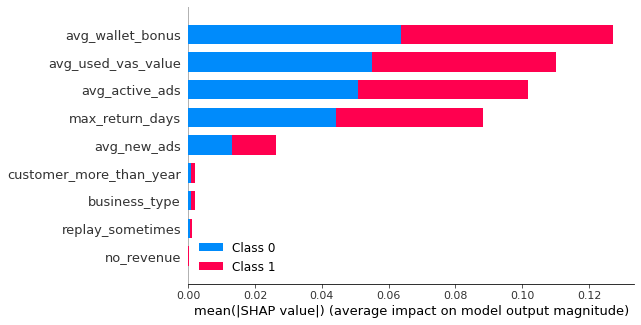

In [339]:
shap.summary_plot(shap_values, X_test)